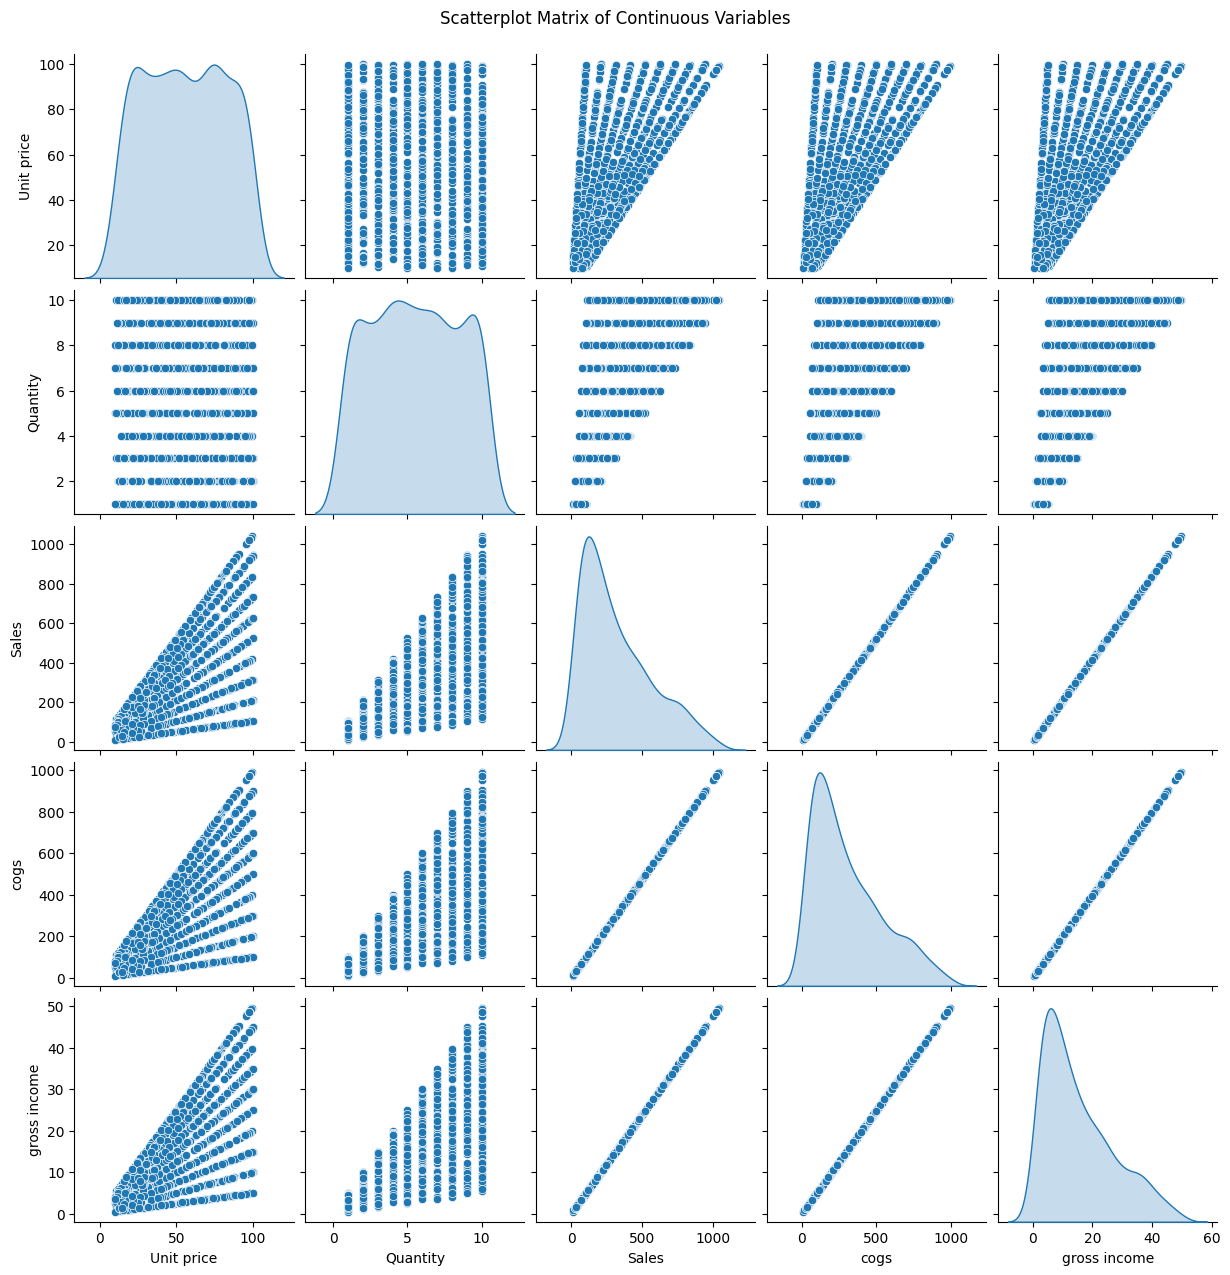

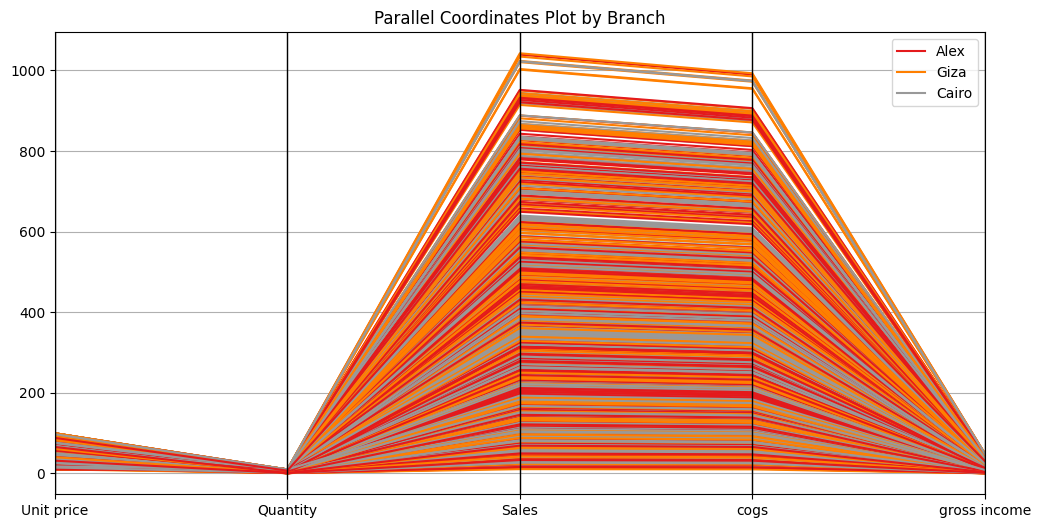

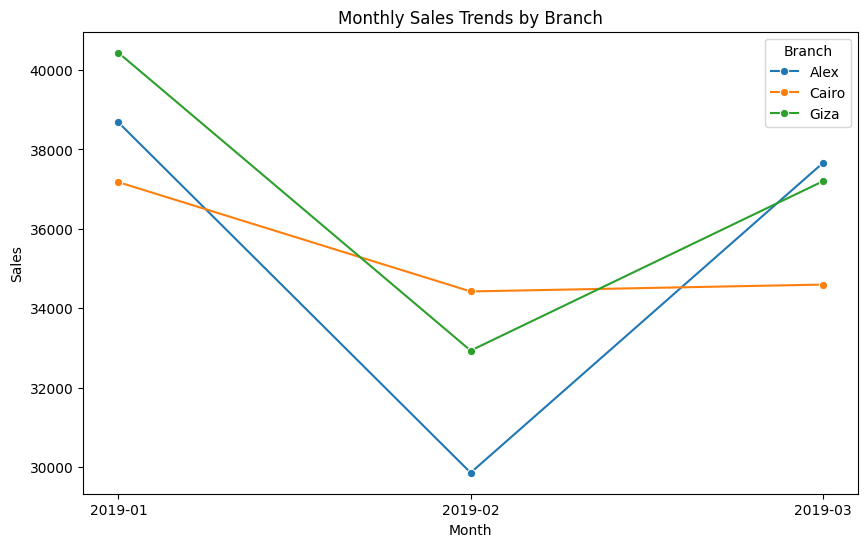

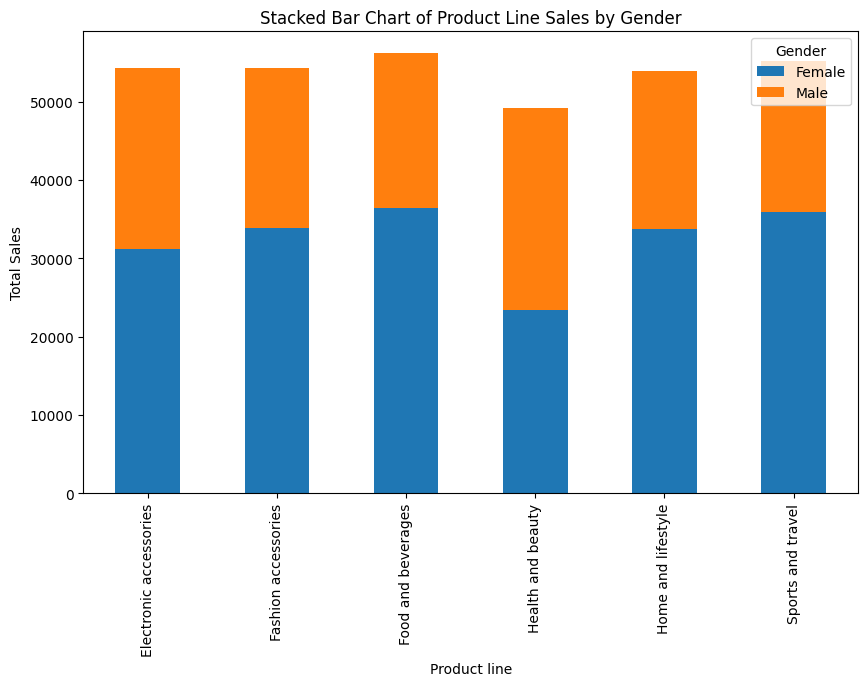

In [ ]:
  Ximport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Step 2: Load Dataset
df = pd.read_csv("SuperMarket Analysis.csv")

# Step 3: Data Preprocessing
df.columns = df.columns.str.strip() # Clean up column names
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

# Step 4: Select Variables
continuous_vars = ['Unit price', 'Quantity', 'Sales', 'cogs', 'gross income']
categorical_var = 'Branch'

# Verify continuous variables exist in DataFrame
missing_vars = [var for var in continuous_vars if var not in df.columns]
if missing_vars:
    print(f"Error: The following continuous variables are not found in the DataFrame: {missing_vars}")
else:
    # Step 5: Scatterplot Matrix
    sns.pairplot(df[continuous_vars], diag_kind='kde')
    plt.suptitle("Scatterplot Matrix of Continuous Variables", y=1.02)
    plt.show()

    # Step 6: Parallel Coordinates
    plt.figure(figsize=(12,6))
    parallel_coordinates(df[[categorical_var] + continuous_vars], categorical_var, colormap=plt.get_cmap("Set1"))
    plt.title("Parallel Coordinates Plot by Branch")
    plt.show()

    # Step 7a: Line Graph (Monthly Sales Trends by Branch)
    monthly_sales = df.groupby(['Month', 'Branch'])['Sales'].sum().reset_index()
    monthly_sales['Month'] = monthly_sales['Month'].astype(str) # Convert Month to string for plotting
    plt.figure(figsize=(10,6))
    sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Branch', marker='o')
    plt.title("Monthly Sales Trends by Branch")
    plt.show()

    # Step 7b: Stacked Bar Chart (Product Line Sales by Gender)
    stack_data = df.groupby(['Product line', 'Gender'])['Sales'].sum().unstack()
    stack_data.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title("Stacked Bar Chart of Product Line Sales by Gender")
    plt.ylabel("Total Sales")
    plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SuperMarket Analysis.csv to SuperMarket Analysis.csv


In [ ]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month'],
      dtype='object')


In [ ]:
print([col.encode('utf-8') for col in df.columns])

[b'Invoice ID', b'Branch', b'City', b'Customer type', b'Gender', b'Product line', b'Unit price', b'Quantity', b'Tax 5%', b'Sales', b'Date', b'Time', b'Payment', b'cogs', b'gross margin percentage', b'gross income', b'Rating', b'Month']


In [ ]:
print(df[continuous_vars].head())
print(df[continuous_vars].info())

KeyError: "['Total'] not in index"

# Task
Generate a treemap and a sunburst visualization using a real-world dataset.

## Load a dataset

### Subtask:
Load a suitable real-world dataset that can be used for treemap and sunburst visualizations. The dataset should have hierarchical or categorical data.


**Reasoning**:
The subtask is to load the data and inspect it. The previous code already loaded the data into `df`. I will now print the head and the columns as requested in the instructions.



In [ ]:
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.columns.to_list())

| Invoice ID   | Branch   | City      | Customer type   | Gender   | Product line           | Unit price   | Quantity   | Tax 5%   | Sales   | Date                | Time        | Payment     | cogs   | gross margin percentage   | gross income   | Rating   | Month   |
|:-------------|:---------|:----------|:----------------|:---------|:-----------------------|:-------------|:-----------|:---------|:--------|:--------------------|:------------|:------------|:-------|:--------------------------|:---------------|:---------|:--------|
| 750-67-8428  | Alex     | Yangon    | Member          | Female   | Health and beauty      | 74.69        | 7          | 26.1415  | 548.971 | 2019-01-05 00:00:00 | 1:08:00 PM  | Ewallet     | 522.83 | 4.7619                    | 26.1415        | 9.1      | 2019-01 |
| 226-31-3081  | Giza     | Naypyitaw | Normal          | Female   | Electronic accessories | 15.28        | 5          | 3.82     | 80.22   | 2019-03-08 00:00:00 | 10:29:00 AM | Cash        | 76.

## Prepare data for treemap

### Subtask:
Select and prepare the data for the treemap visualization. This may involve aggregating data and defining the hierarchy.


**Reasoning**:
Group the data by the specified columns, sum the 'Sales', reset the index, and then display the head and info of the resulting DataFrame to prepare the data for the treemap visualization.



In [ ]:
treemap_data = df.groupby(['Branch', 'City', 'Product line'])['Sales'].sum().reset_index()
display(treemap_data.head())
treemap_data.info()

,Branch,City,Product line,Sales
0,Alex,Yangon,Electronic accessories,18317.1135
1,Alex,Yangon,Fashion accessories,16332.5085
2,Alex,Yangon,Food and beverages,17163.1005
3,Alex,Yangon,Health and beauty,12597.7530
4,Alex,Yangon,Home and lifestyle,22417.1955


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Branch        18 non-null     object 
 1   City          18 non-null     object 
 2   Product line  18 non-null     object 
 3   Sales         18 non-null     float64
dtypes: float64(1), object(3)
memory usage: 708.0+ bytes


## Construct treemap

### Subtask:
Generate the treemap display using the prepared data.


**Reasoning**:
Generate a treemap using plotly.express with the prepared data, defining the hierarchy and values, and setting a title.



In [ ]:
import plotly.express as px

fig = px.treemap(treemap_data, path=['Branch', 'City', 'Product line'], values='Sales',
                 title='Sales Treemap by Branch, City, and Product Line')
fig.show()

## Prepare data for sunburst

### Subtask:
Select and prepare the data for the sunburst visualization. This may involve aggregating data and defining the hierarchy, similar to the treemap but structured for a radial layout.


**Reasoning**:
Group the DataFrame by 'Branch', 'City', and 'Product line', sum the 'Sales', reset the index, store in `sunburst_data`, and then display the head and info of the resulting DataFrame.



In [ ]:
sunburst_data = df.groupby(['Branch', 'City', 'Product line'])['Sales'].sum().reset_index()
display(sunburst_data.head())
sunburst_data.info()

,Branch,City,Product line,Sales
0,Alex,Yangon,Electronic accessories,18317.1135
1,Alex,Yangon,Fashion accessories,16332.5085
2,Alex,Yangon,Food and beverages,17163.1005
3,Alex,Yangon,Health and beauty,12597.7530
4,Alex,Yangon,Home and lifestyle,22417.1955


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Branch        18 non-null     object 
 1   City          18 non-null     object 
 2   Product line  18 non-null     object 
 3   Sales         18 non-null     float64
dtypes: float64(1), object(3)
memory usage: 708.0+ bytes


## Construct sunburst

### Subtask:
Generate the sunburst display using the prepared data.


**Reasoning**:
Generate a sunburst chart using the prepared data.



In [ ]:
import plotly.express as px

fig = px.sunburst(sunburst_data, path=['Branch', 'City', 'Product line'], values='Sales',
                  title='Sales Sunburst Chart by Branch, City, and Product Line')
fig.show()

## Summary:

### Data Analysis Key Findings

*   The treemap and sunburst visualizations represent the total sales aggregated by 'Branch', 'City', and 'Product line'.
*   The treemap shows the hierarchical sales distribution using nested rectangles, where the size of each rectangle corresponds to the sales value.
*   The sunburst chart displays the same hierarchical data in a radial layout, with concentric rings representing the different levels of the hierarchy and the size of each segment reflecting the sales value.

### Insights or Next Steps

*   Analyze the generated treemap and sunburst visualizations to identify which branches, cities, and product lines contribute the most to overall sales.
*   Drill down into specific segments of the sunburst or treemap to explore sales performance within a particular branch, city, or product category.
